# K-Means Algorithm

- Specify the number of clusters we want.
- We randomly assign data points as the cluster centers.
- Calculate the distance of all the data points from each cluster centers.
- Based on the minimum distance, we assign the data points to that cluster.
- Update the cluster centers.
- Keep on repeating this process, until no further reassignment is happening.

## Import Settings

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
rng = np.random.default_rng(seed = 138)

## Toy Dataset

In [12]:
mus = np.array([
    [-3,3],
    [3,-3],
    [3,3]
])
mus.shape

(3, 2)

In [13]:
mus = np.array([
    [-3,3],
    [3,-3],
    [3,3]
])
cov = np.eye(2)
n = 60

xvals = [rng.multivariate_normal(
    mus[i], cov, size = n//3)
    for i in range(3)]

X = np.concatenate(xvals, axis = 0).T
X = X.astype(np.float32)
X.shape

(2, 60)

In [21]:
X[:5]

array([[-4.671316  , -4.365759  , -4.340134  , -3.3756087 , -4.3413825 ,
        -1.6536055 , -1.6509681 , -4.2229915 , -4.2127304 , -2.9780848 ,
        -3.3307147 , -3.527374  , -3.452177  , -3.4146214 , -3.023798  ,
        -1.7338833 , -3.1479669 , -2.2702377 , -3.1168396 , -2.5429835 ,
         5.170179  ,  2.2957304 ,  1.0563706 ,  3.919575  ,  4.1519184 ,
         2.1380126 ,  4.5504956 ,  2.915009  ,  3.2976043 ,  1.5103539 ,
         3.3434126 ,  2.535639  ,  1.5632894 ,  2.4580662 ,  4.603359  ,
         3.7045717 ,  2.8025048 ,  3.9290426 ,  4.0254197 ,  0.99859506,
         2.8764398 ,  2.6777866 ,  2.140428  ,  4.4709687 ,  2.5010543 ,
         2.836397  ,  2.7327116 ,  3.6797905 ,  3.2486227 ,  2.9836142 ,
         3.868062  ,  4.785937  ,  3.4479275 ,  2.24077   ,  1.7253873 ,
         2.2244294 ,  2.8004372 ,  3.2562885 ,  5.639352  ,  3.7532704 ],
       [ 2.3596983 ,  1.9276427 ,  3.9096887 ,  3.400508  ,  2.4861794 ,
         3.2088408 ,  1.9916195 ,  3.182797  ,  2.

## Visualize the dataset

(np.float64(-5.186849546432495),
 np.float64(6.154885244369507),
 np.float64(-4.8857441425323485),
 np.float64(5.386966753005981))

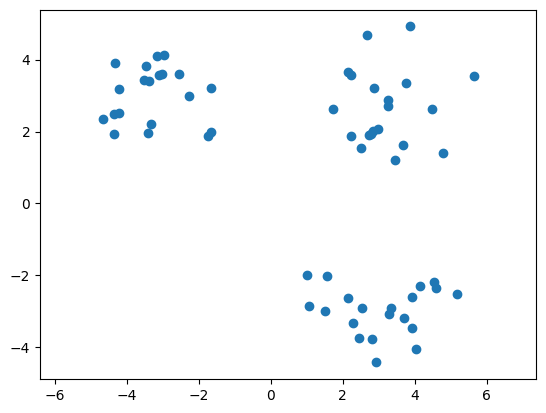

In [29]:
plt.scatter(X[0], X[1])
plt.axis('equal')


## Step 1 : Initialization

Let us choose ***K*** points uniformly at random from the dataset and call them the ***K*** initial means. For this example, we shall use ***K*** = 3.

In [31]:
k = 3
d,n = X.shape
index = rng.choice(np.arange(n), size = k, replace = False)
index

array([48, 37, 29])

In [32]:
k = 3
d,n = X.shape

ind = rng.choice(np.arange(n), size = k, replace = False)
mus = X[ : , ind]
mus

array([[-3.527374 , -4.671316 ,  2.9836142],
       [ 3.4247491,  2.3596983,  2.0726132]], dtype=float32)

In [36]:
mus.shape

(2, 3)

`mus[ : , j]` gives the mean of the ***i***^th  cluster. The array `mus` is of the shape ***d x k***. Each column corresponds to a mean.

## Step 2 : Cluster Assignment

We will now compute the cluster closest to each point in the dataset and store in the array z. Clusters are indexed from 0 to k-1.

In [37]:
z = np.zeros(n)
for i in range(n) :
  dist = np.linalg.norm(
      mus - X[ : , i].reshape(d,1),
      axis = 0
  )
  z[i] = np.argmin(dist)

## Step 3 : Cluster centers

It is now time to recompute the cluster centers. If a cluster has at least one (actually two) point assigned to it, we need to update the center to the mean of all points assigned to it.

In [38]:
for j in range(k) :
  if np.any(z == j) :
    mus[ : , j] = X[ : , z == j].mean(axis = 1)

## K-means function

We now have all the ingredients to turn this into a function. We need to loop through steps two and three until convergence. Recall that k-means always converges. The convergence criterion is to stop iterating when the cluster assignments do not change. To help with this, we will introduce a new array, `z_prev`, that keeps track of the previous cluster assignment.

In [42]:
def k_means(X, k = 3):
    d, n = X.shape
    # Step-1: Initialization
    ind = rng.choice(
        np.arange(n),
        size = k,
        replace = False
        )
    mus = X[:, ind]
    z_prev, z = np.zeros(n), np.ones(n)
    while not np.array_equal(z_prev, z):
        z_prev = z.copy()
        # Step-2: Cluster Assignment
        for i in range(n):
            dist = np.linalg.norm(
                mus - X[:, i].reshape(d, 1),
                axis = 0
                )
            z[i] = np.argmin(dist)
        # Step-3: Compute centers
        for j in range(k):
            if np.any(z == j):
                mus[:, j] = X[:, z == j].mean(axis = 1)
    return z.astype(np.int8), mus

## Visualize

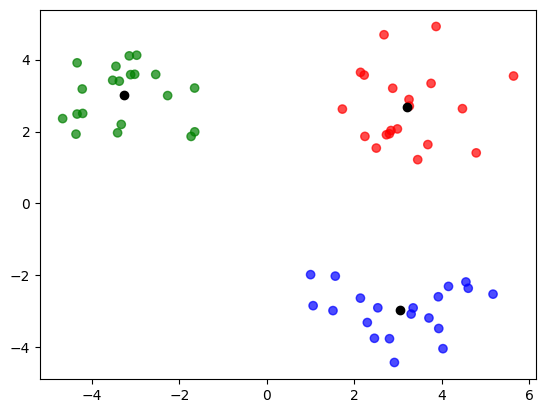

In [46]:
z, mus = k_means(X)
colors = np.array(['red', 'green', 'blue'])
plt.scatter(
    X[0, :],
    X[1, :],
    c = colors[z],
    alpha = 0.7
    )
plt.scatter(
    mus[0, :],
    mus[1, :],
    color = 'black');

## NOTE :

A few additional points related to `NumPy.Z_prev.copy()` does a deep copy in NumPy. To see we need a deep copy, consider :      

In [49]:
a = np.array([1,2,3])
b = a
b[0] += 100
print(a, b)

[101   2   3] [101   2   3]


Notice how `a` and `b` change when only  `b` is updated. This is because, both `a` and `b` point to the same object. To avoid this, we have :    

In [52]:
a = np.array([1,2,3])
b = np.copy(a)
b[0] += 100
print(a, b)

[1 2 3] [101   2   3]


This `astype` method allows us to typecast arrays

In [62]:
a = np.array([1,2,3])
print(a.dtype, a)
a = a.astype(np.float32)
print(a.dtype, a)
a = a.astype(np.object_)
print(a.dtype, a)

int64 [1 2 3]
float32 [1. 2. 3.]
object [1.0 2.0 3.0]
